BASIC SENTIMENT ANALYSIS
-----------
(ANALYSIS A MOVIE REVIEW AS POSITIVE OR NEGATIVE FROM IMDB DATASET)
------

In [6]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
#x_train-->review    y_train-->positive(1) or negative(0)
#getting reviews from imdb and storing it
#load-data is a helper function of keras 
#keras has inbuilt imdb database which we can download 

17465344/17464789 [==============================] - 77s 4us/step


In [7]:
print(x_train[0])

#Neural networks dont understand text They only understand numbers
#So the reviews are here are converted into numbers
#From the reviews we collect unique words called the bag of words
#each unique word is given a token number
#So the numbers below are tokn values of the words in the review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
print(y_train[0])
#label for 1st element is 1 .So its a negative review

1


In [9]:
#Define a class for our reference
class_name=['Negative','Positive']


In [11]:
#keras has a helper function(get_word_index()) which helps to get 
#index for  words for numberic representation
#words --->keys  token-->value(dictionary)


#imdb db consists of several wordindex 
word_index=imdb.get_word_index()
#hello is tokenised by the dataset 
print(word_index['hello'])


4822


''''''''''''''''''''''''DECODING THE REVIEWS'''''''''''''''''''''''''
#the numberic representaions are converted back to text

In [16]:
#REVERSE THE KEY(words) AS VALUE_created AND VALUE(token) AS KEY_created

reverse_word_index=dict((value,key)for key,value in word_index.items())

def decode(review):
    text=''
    for i in review:
        text+=reverse_word_index[i]
        text+=' '
    return text    

decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [17]:
def show_len():
    print('len of 1st training example:',len(x_train[0]))
    print('len of 2nd training example:',len(x_train[1]))
    print('len of 1st test example:',len(x_test[0]))
    print('len of 1st training example:',len(x_test[1]))

In [18]:
show_len()

len of 1st training example: 218
len of 2nd training example: 189
len of 1st test example: 68
len of 1st training example: 260


'''''''''''PADDING THE EXAMPLES''''''''''''''''''
So to use in neural network we need equal lengths so we simply padd values 

In [19]:
word_index['the']

1

In [22]:
#keras has helper function pad_sequnece which sets the max length for each data
#so we pad upto 256 
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train =pad_sequences(x_train,value=word_index['the'],padding ='post',maxlen=256)
x_test =pad_sequences(x_test,value=word_index['the'],padding ='post',maxlen=256)


In [23]:
show_len()

len of 1st training example: 256
len of 2nd training example: 256
len of 1st test example: 256
len of 1st training example: 256


In [24]:
#So now all the extra values are padded as the 
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [25]:
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

WORD EMBEDDINGS
-----------------------------------
ONE HOT ENCODING:
-------------------------------

If the algorithm learns 

This tuna 'sandwich' is quite tasty .

It cannot translate the learnig to 

This chicken '-------- ' is quite tasty 

WORD EMBEDDINGS:
-------------------------------

If the algorithm learns 
This tuna 'sandwich' is quite tasty .

It CAN extrapolate the learning to :
This chicken 'sandwich ' is quite tasty 


for each feature several words have different values
eg:




FEATURE ----->   :WORDS






Greeting:
tuna ->0.01
Chicken-->-0.04
hello-->0.99
hey-->0.91

Food:
tuna-->0.92
chicken-->1.00
hello-->0.11
hey-->0.03

so we take 16 features for our 10,000 words
The high value of the word with the feature makes it to match with the context.
the value of the features are being learnt while training

CREATE AND TRAIN MODEL
-----------------------------------------

There are two ways to build Keras models:
------------------------------------------------------------
sequential and functional.
------------------------------------

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.


Creation:
-----------------

In [35]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import GlobalAveragePooling1D
from tensorflow.python.keras.layers import Dense, Embedding

#sequential class 
#embedding layer  -->from keras is used to train


#16 *10000embedded layer output goes to 
#global average pooling which creates a 16 dimensional vector for each training batch
#And the is connected densely wih next layer with 16 nodes and the activation is RELU
#The output layer is densely connected with sigmoid activation function which gives a binary output
#(0-negative review,  1-positive review)


model=Sequential([
    Embedding(10000, 16),#Words and feature size
    GlobalAveragePooling1D(),#10000 x 16 is converted to 1D array
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(
       loss ='binary_crossentropy',
       optimizer='adam',
       metrics=['accuracy']
    )

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


TRAINING:
----------------------

fit method is used to monitor the traning at each epochs 
m
lambda callback justprints epoch number " . " after each epoch.

validation split=the training set is split as 20% that is each batch as 2000 reviews.

In [42]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log=LambdaCallback(on_epoch_end =lambda e ,l:print(e,end='.'))

E=20

h=model.fit(
  x_train,y_train,
    validation_split=0.2,
    epochs=E,
    callbacks=[simple_log],
    verbose=False #  put one for progress bar
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

PREDICTION AND EVALUATION
--------------------------------------------------
Plot the values of accuracy during training and validation in a graph using matplotlib


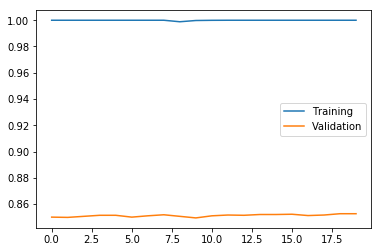

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E),h.history['accuracy'],label ='Training')
plt.plot(range(E),h.history['val_accuracy'],label ='Validation')
plt.legend()
plt.show()

In [45]:
#Test accuracy 

loss,acc=model.evaluate(x_test ,y_test)
print('Test set accuracy:' ,acc*100)

782/782 [==============================] - 1s 949us/step - loss: 2.3649 - accuracy: 0.8300
Test set accuracy: 83.00399780273438


In [49]:
import numpy as np

p=model.predict(np.expand_dims(x_test[1],axis=1))
print(class_name[np.argmax(p[1])])


Negative


In [50]:
decode(x_test[1])#the sequence is not clear but review is bad 

"is quite br mankind most that quest are chase to being quickly of little it time hell to plot br of something long put are of every place this consequence and of interplay storytelling being nasty not of you warren in is failed club i i of films pay so sequences and film okay uses to received and if time done for room sugar viewer as cartoon of gives to forgettable br be because many these of reflection sugar contained gives it wreck scene to more was two when had find as you another it of themselves probably who interplay storytelling if itself by br about 1950's films not would effects that her box to miike for if hero close seek end is very together movie of wheel got say kong sugar fred close bore there is playing lot of and pan place trilogy of lacks br of their time much this men as on it is telling program br silliness okay and to frustration at corner and she of sequences to political clearly in of drugs keep guy i i was throwing room sugar as it by br be plot many for occasio